In [15]:
import dtale
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
dataset = pd.read_csv("trainReg.csv", sep = ',')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77779 entries, 0 to 77778
Data columns (total 92 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      77779 non-null  int64  
 1   Y       77779 non-null  int64  
 2   V1      77779 non-null  float64
 3   V2      77779 non-null  float64
 4   V3      77779 non-null  int64  
 5   V4      77779 non-null  float64
 6   V5      77779 non-null  float64
 7   V6      77779 non-null  float64
 8   V7      77779 non-null  float64
 9   V8      77779 non-null  float64
 10  V9      77779 non-null  float64
 11  V10     77779 non-null  float64
 12  V11     77779 non-null  float64
 13  V12     77779 non-null  float64
 14  V13     77779 non-null  float64
 15  V14     77779 non-null  float64
 16  V15     77779 non-null  float64
 17  V16     77779 non-null  float64
 18  V17     77779 non-null  float64
 19  V18     77779 non-null  float64
 20  V19     77779 non-null  float64
 21  V20     77779 non-null  float64
 22

In [4]:
dataset.head()

,ID,Y,V1,V2,V3,V4,V5,V6,V7,V8,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,1,2013,44.81144,0.83826,0,7.91314,10.94148,-0.04547,-15.16332,-10.47324,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,2,1998,41.99180,7.99976,0,64.26707,16.54115,-9.28737,-40.73524,33.60440,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,3,1998,42.19196,2.23111,0,65.07719,24.99746,1.76100,6.66573,3.45778,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,4,1998,39.28634,-1.85716,0,91.04190,9.08333,0.08502,-5.59216,65.62463,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,5,1998,40.36025,2.94918,0,53.83723,13.71369,-8.21964,-40.21636,21.22366,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159


In [5]:
def get_significant_correlations(df, threshold):
    # Calcula la matriz de correlación de Pearson
    corr_matrix = df.corr()

    # Obtiene las columnas del dataframe original
    columns = df.columns

    # Crea una lista vacía para almacenar las correlaciones significativas
    significant_corr = []

    # Itera sobre las filas y columnas de la matriz de correlación
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            # Obtiene el valor de correlación entre las dos variables
            corr = corr_matrix.iloc[i, j]
            
            # Verifica si el valor de correlación supera el threshold y lo agrega a la lista de correlaciones significativas
            if abs(corr) >= threshold or abs(corr) <= (threshold * -1)  :
                significant_corr.append({'Variable 1': columns[i],
                                         'Variable 2': columns[j],
                                         'Correlation': corr})

    # Crea un dataframe a partir de la lista de correlaciones significativas
    significant_corr_df = pd.DataFrame(significant_corr)

    return significant_corr_df

# Variables con correlaciones más significativas
threshold = 0.7
significant_correlations = get_significant_correlations(dataset, threshold)
print(significant_correlations)

  Variable 1 Variable 2  Correlation
0        V16        V18     0.805076
1        V16        V20     0.725603
2        V16        V23     0.843291
3        V18        V22     0.721719
4        V18        V23     0.859658
5        V20        V22     0.872319
6        V20        V23     0.711287
7        V22        V23     0.716559


In [6]:
dataset.Y.value_counts()

2011    5765
2010    5594
2009    5346
2012    5242
2013    4439
        ... 
1934       1
1950       1
1943       1
1926       1
1944       1
Name: Y, Length: 74, dtype: int64

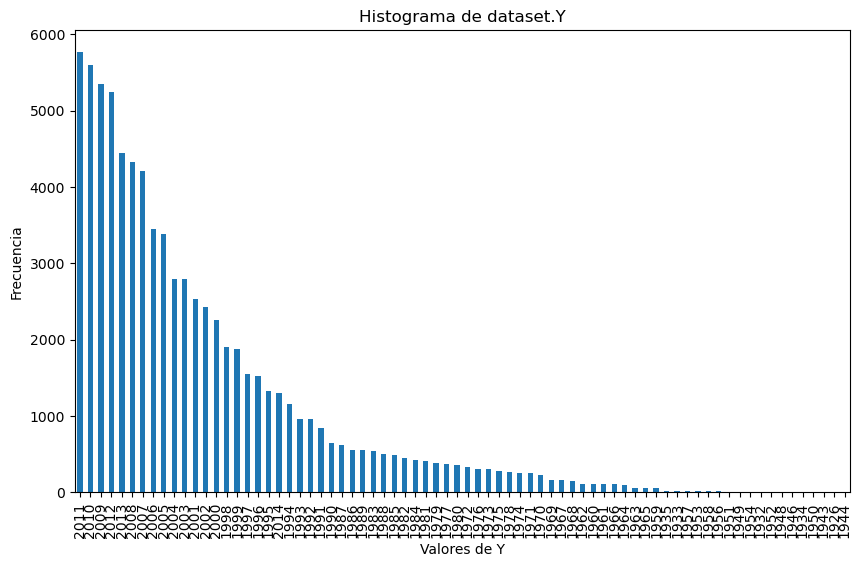

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dataset.Y.value_counts().plot(kind='bar')

plt.xlabel('Valores de Y')
plt.ylabel('Frecuencia')
plt.title('Histograma de dataset.Y')

plt.show()


- Las redes neuronales sn susceptibles a la correlación entre variables?
- Estandarizar las variables
- No se requiere codificar variables categóricas porque no hay
- No hay datos faltantes
- Hay desbalanceo en el valor a predecir pues hay miles de muestras más para años recientes que para los primeros años.  Las redes neuronales son vulnerables al desbalanceo?
- Aplicar reducción de dimensionalidad?

In [8]:
dtale.show(dataset, open_browser=True)

In [43]:
# Definición de las variables timbre y covarianza
var_timbre = dataset.iloc[:, 2:14]
var_covarianza = dataset.iloc[:, 14:92]

In [12]:
var_timbre.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
0,44.81144,0.83826,0,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,10.57382,-11.21128,17.35885
1,41.99180,7.99976,0,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,-6.79144,44.21327,0.69747
2,42.19196,2.23111,0,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,-18.45069,233.16766,18.80432
3,39.28634,-1.85716,0,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,11.70269,79.90772,45.36288
4,40.36025,2.94918,0,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,0.14463,72.23955,-7.49930


In [44]:
var_covarianza.head()

,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,...,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90
0,11.60509,1676.12521,740.44624,1429.74866,504.96227,1161.07673,496.69619,544.63214,272.70889,436.57931,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,17.40287,968.15417,1661.28880,2948.99579,561.83555,1312.92773,363.32452,468.80717,242.66773,306.52110,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,11.42375,1190.67124,1333.60694,744.85361,437.21015,423.21534,391.60168,322.22020,459.87163,278.89877,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,32.37374,989.23780,3905.80528,5926.64642,662.88498,4645.72336,841.55741,378.40232,281.52100,377.25144,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,12.86544,1200.94135,966.97337,1395.75250,412.76502,954.28891,620.44882,371.45147,446.13344,240.03331,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159


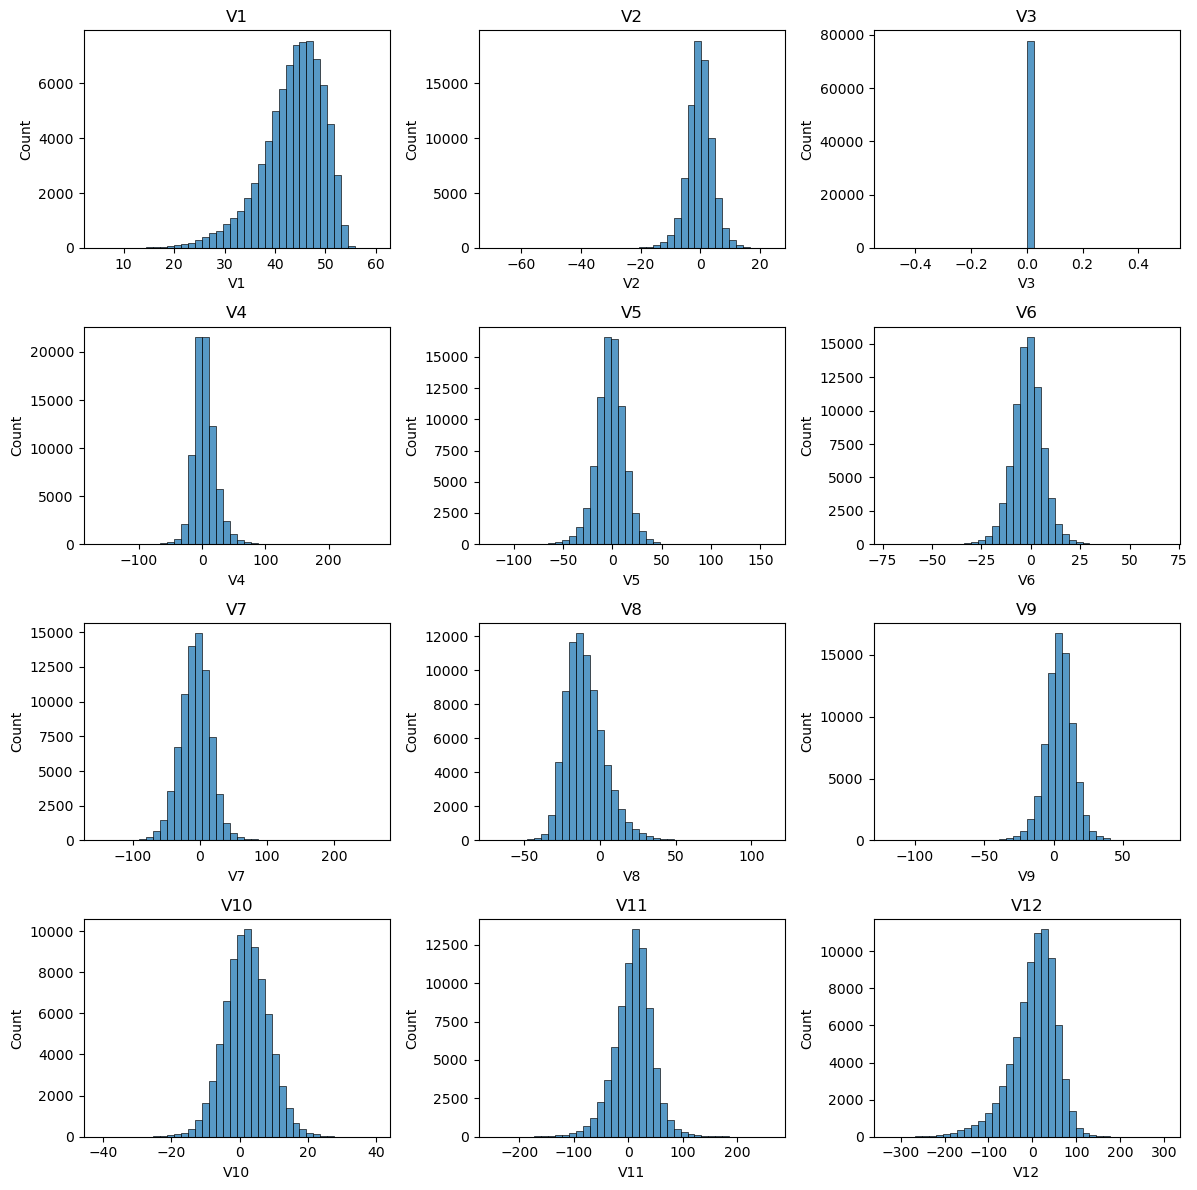

In [23]:
# Creación de histogramas para las variables de timbre
fig, axes = plt.subplots(4, 3, figsize=(12, 12))  # Ajustar tamaño de la figura

cont = 0  # Contador para la posición del subplot
for i in range(4):
    for j in range(3):
        if cont < 12:  # Verificar si se han creado los 12 histogramas
            ax = axes[i, j]
            variable = var_timbre.iloc[:, cont]
            sns.histplot(variable, bins=40, ax=ax)
            ax.set_title(f"V{cont+1}")
            cont += 1

plt.tight_layout()
plt.show()

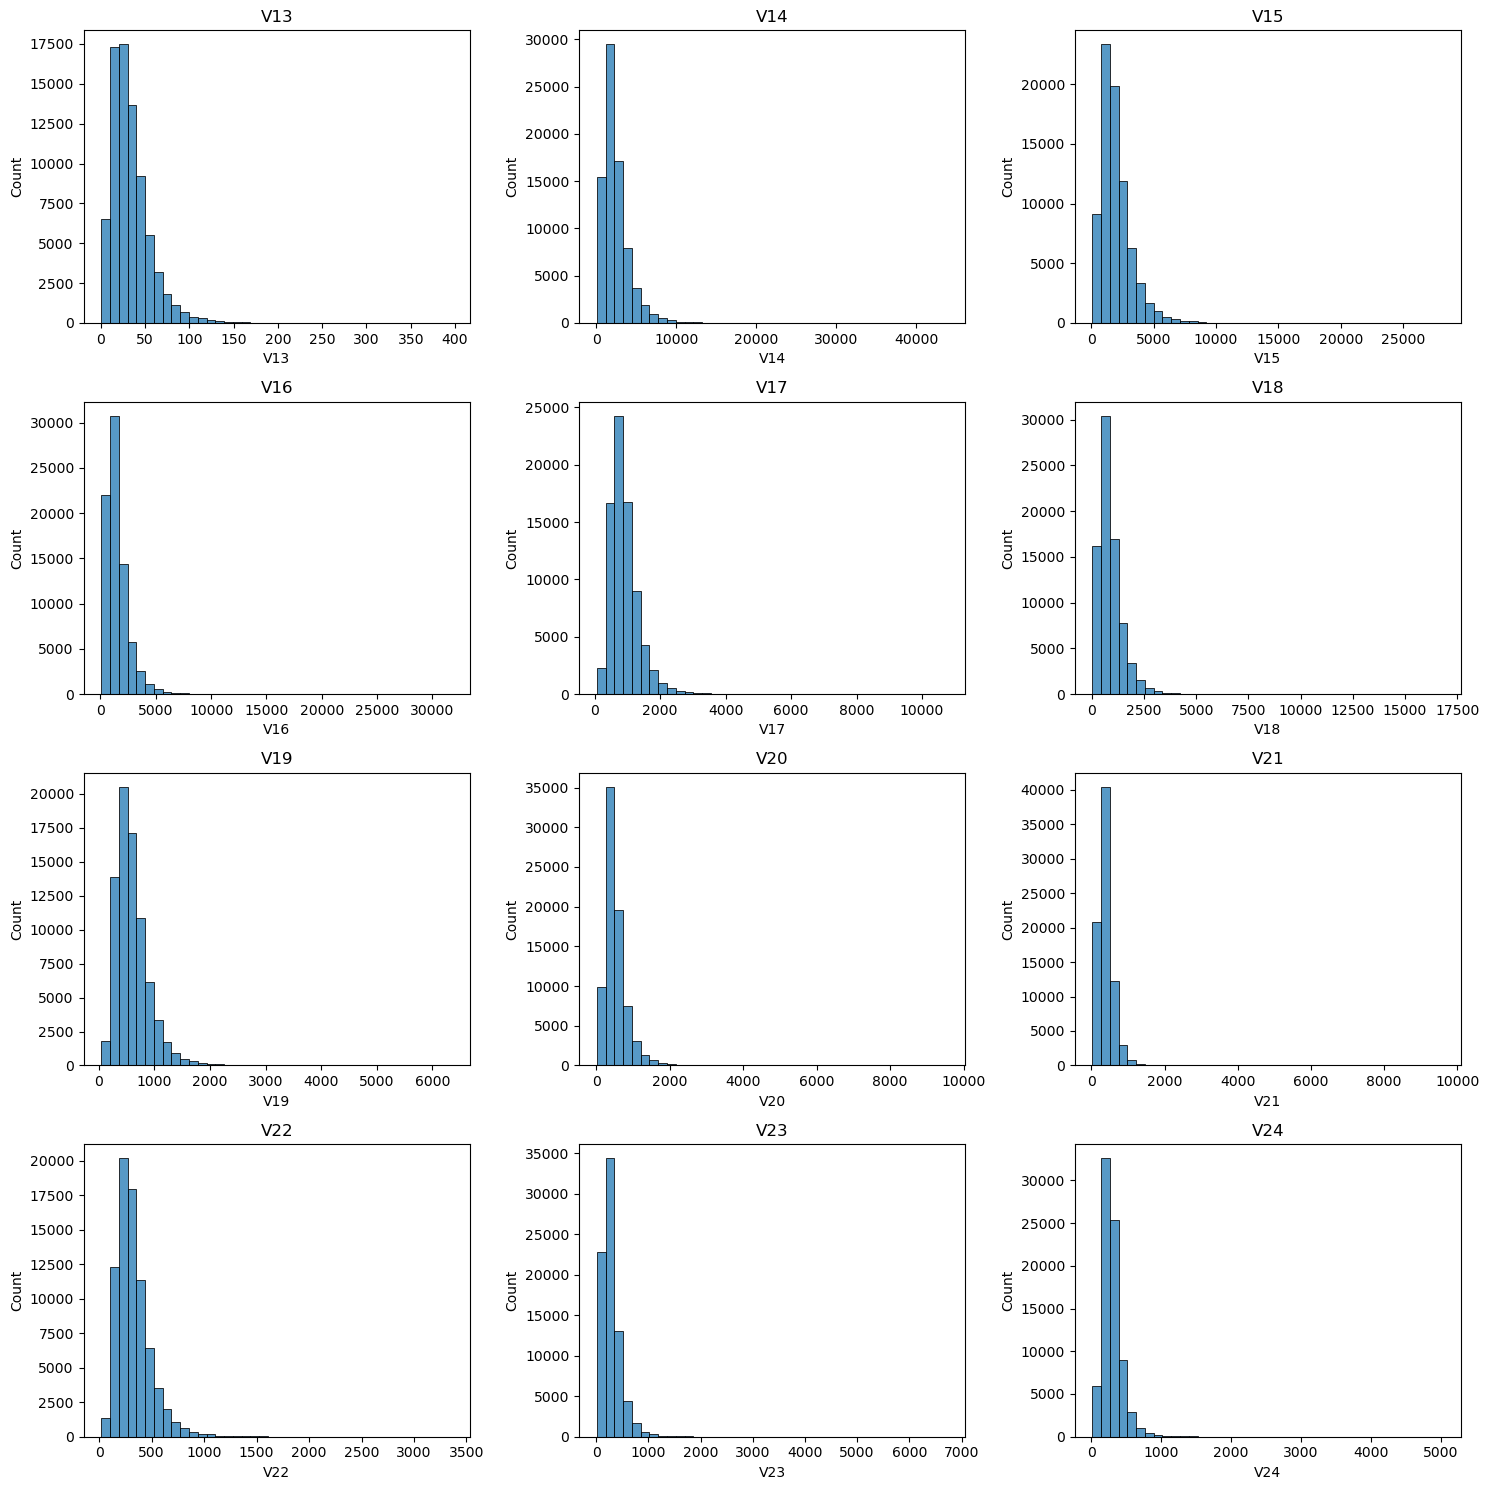

In [45]:
# Creación de histogramas para las variables de covarianza
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Ajustar tamaño de la figura

for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        variable = var_covarianza.iloc[:, i*3+j]
        sns.histplot(variable, bins=40, ax=ax)  # Ajustar número de bins
        ax.set_title(f"V{i*3+j+13}")

plt.tight_layout()
plt.show()

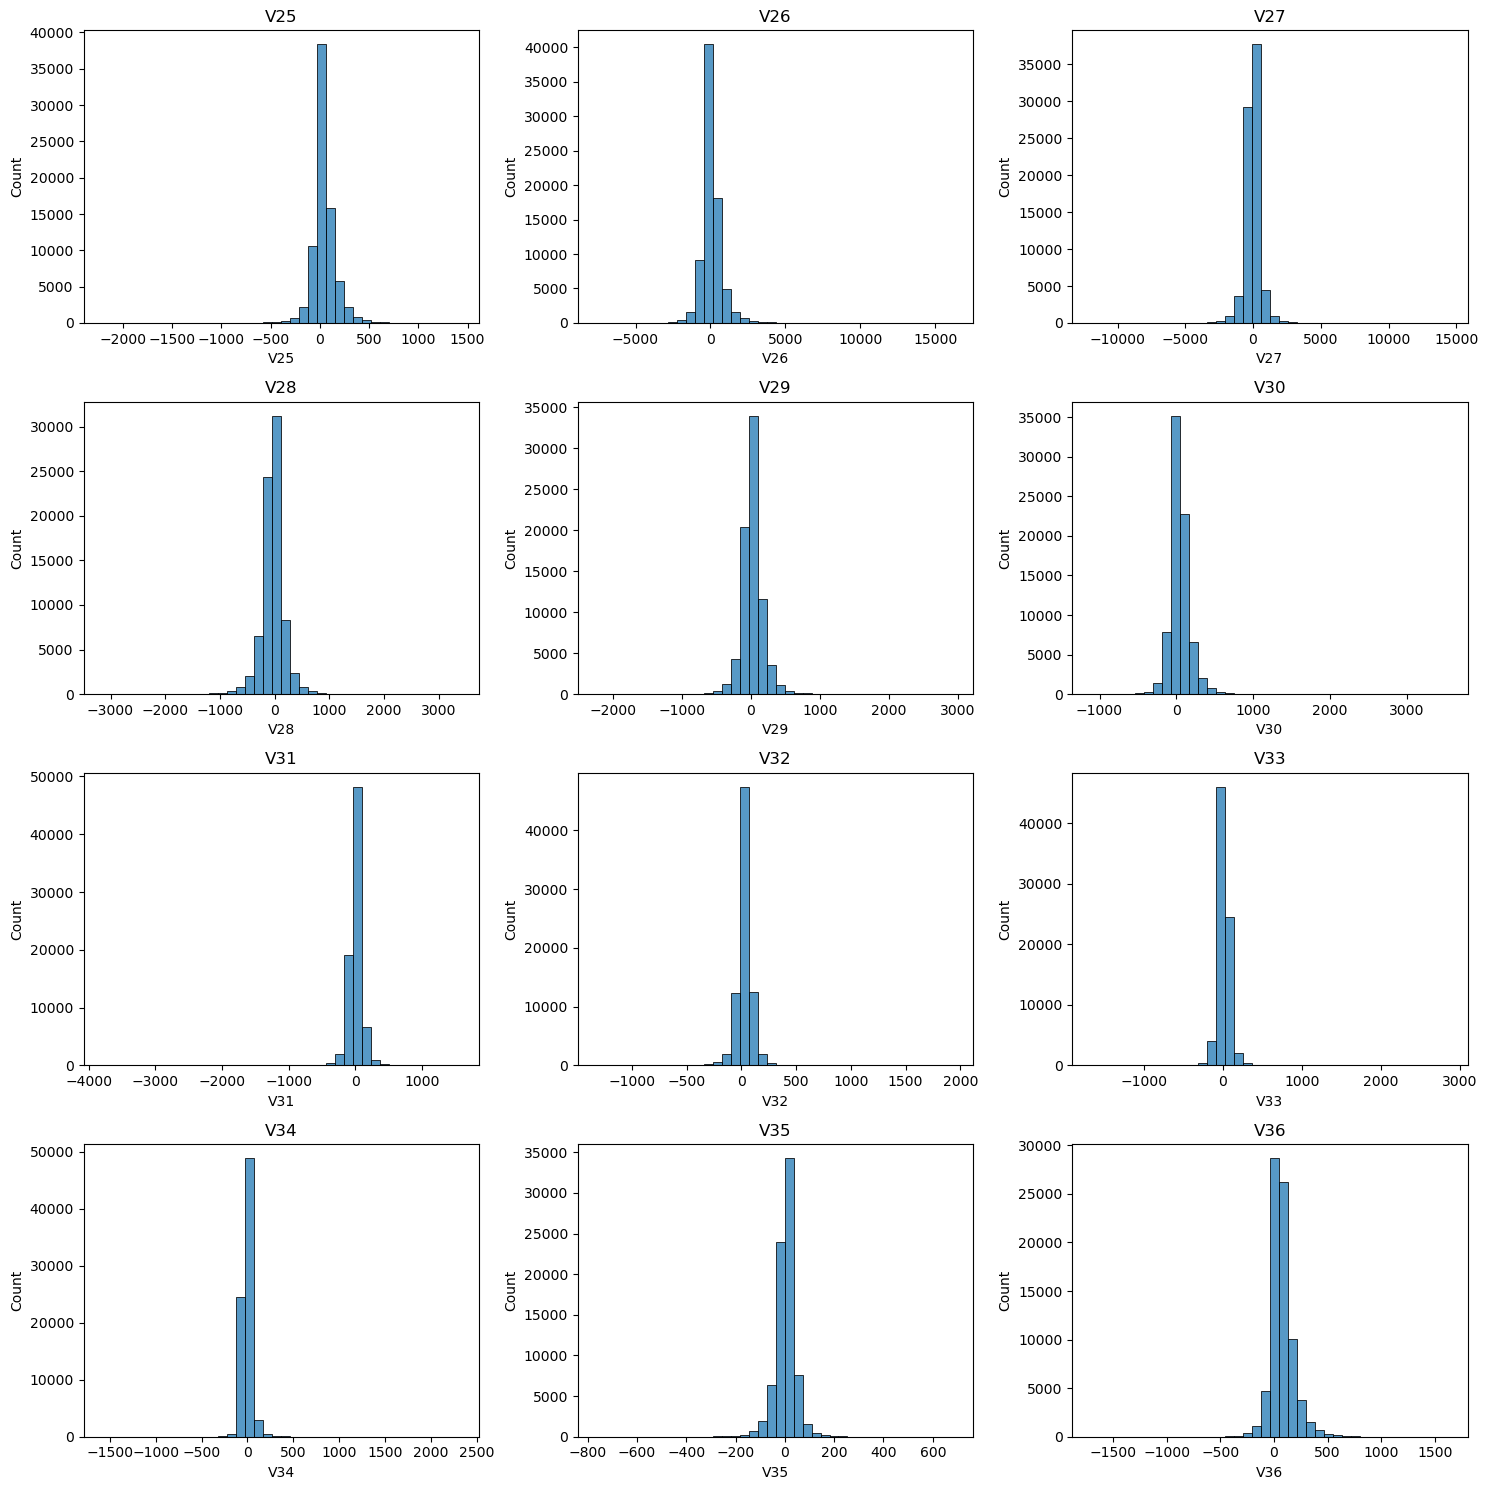

In [46]:
# Creación de histogramas para las variables de covarianza
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Ajustar tamaño de la figura

for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        variable = var_covarianza.iloc[:, i*3+j+12]
        sns.histplot(variable, bins=40, ax=ax)  # Ajustar número de bins
        ax.set_title(f"V{i*3+j+13+12}")

plt.tight_layout()
plt.show()

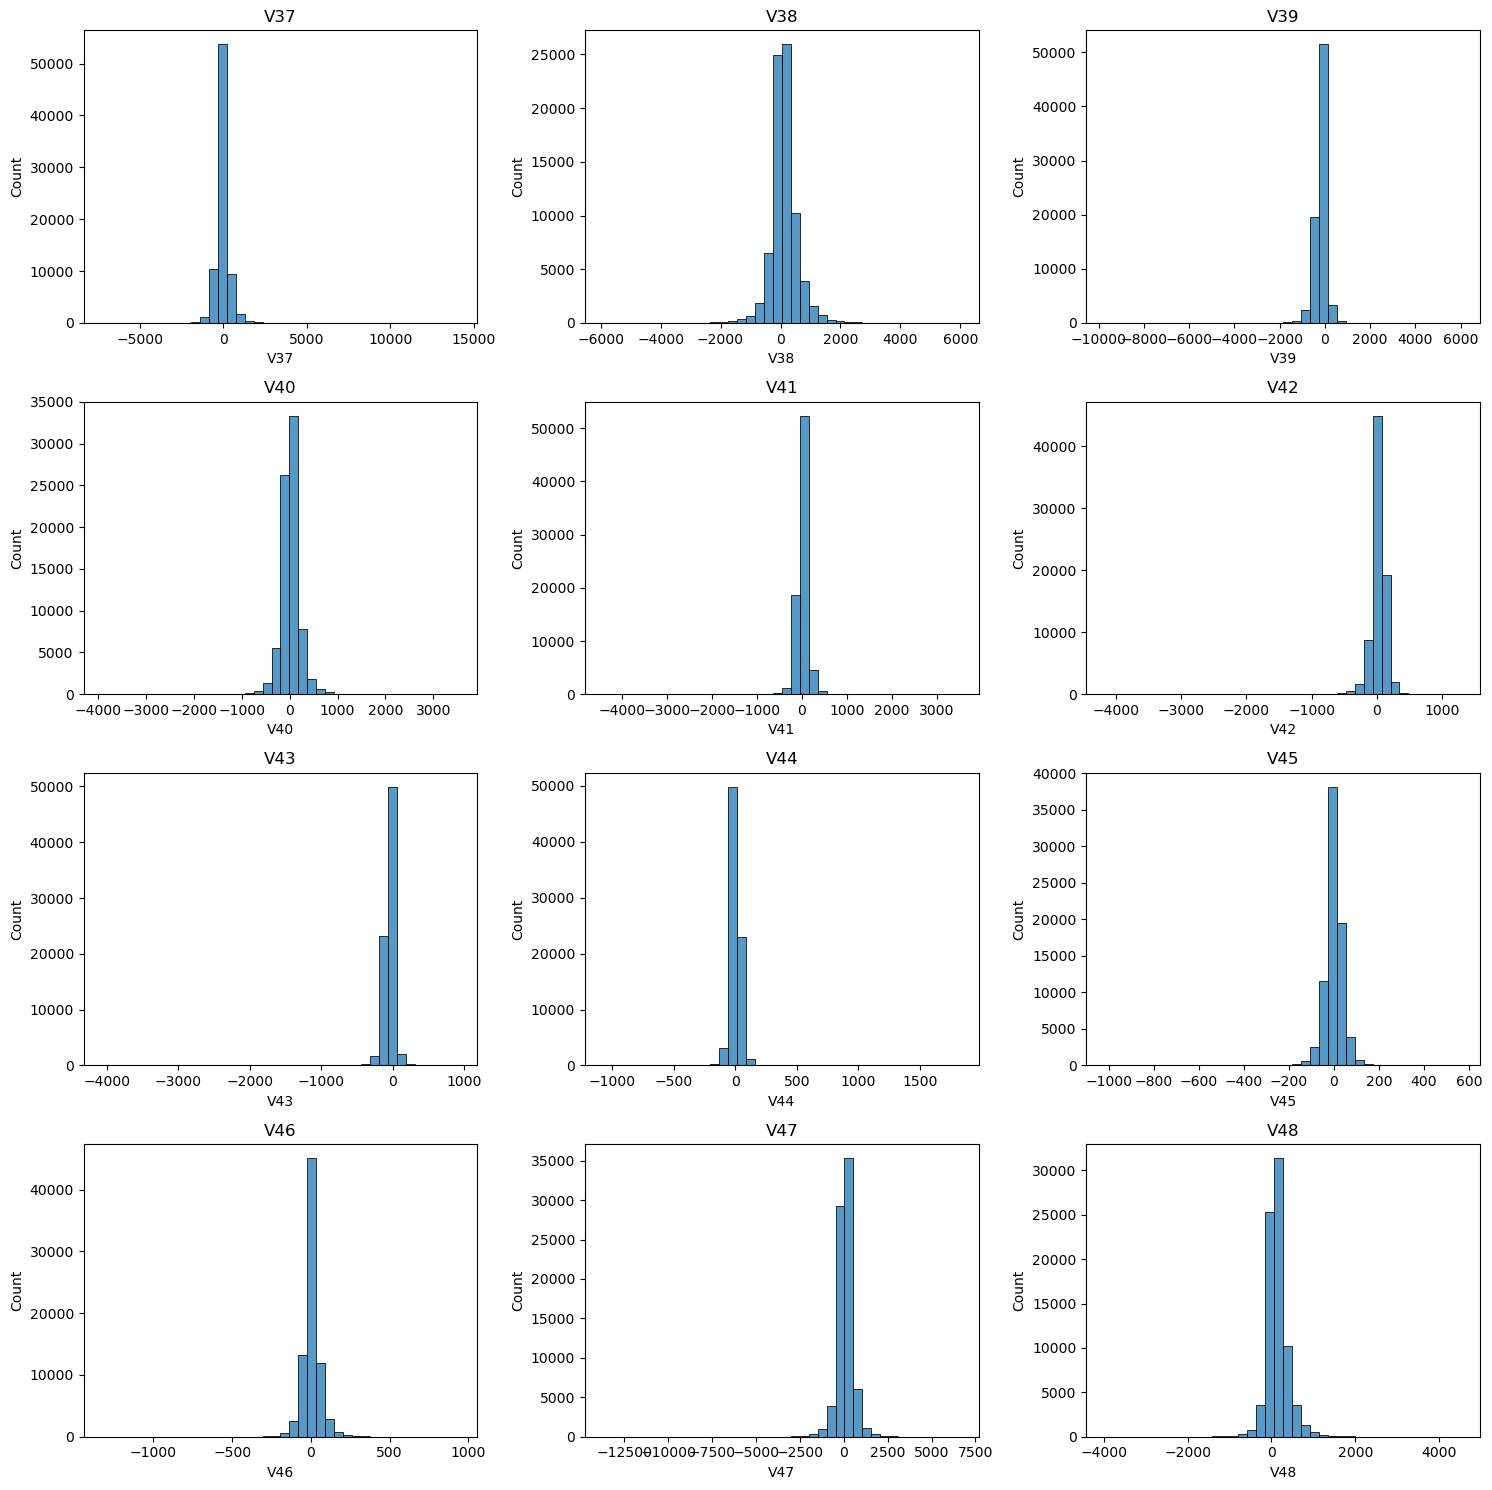

In [47]:
# Creación de histogramas para las variables de covarianza
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Ajustar tamaño de la figura

for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        variable = var_covarianza.iloc[:, i*3+j+24]
        sns.histplot(variable, bins=40, ax=ax)  # Ajustar número de bins
        ax.set_title(f"V{i*3+j+13+24}")

plt.tight_layout()
plt.show()

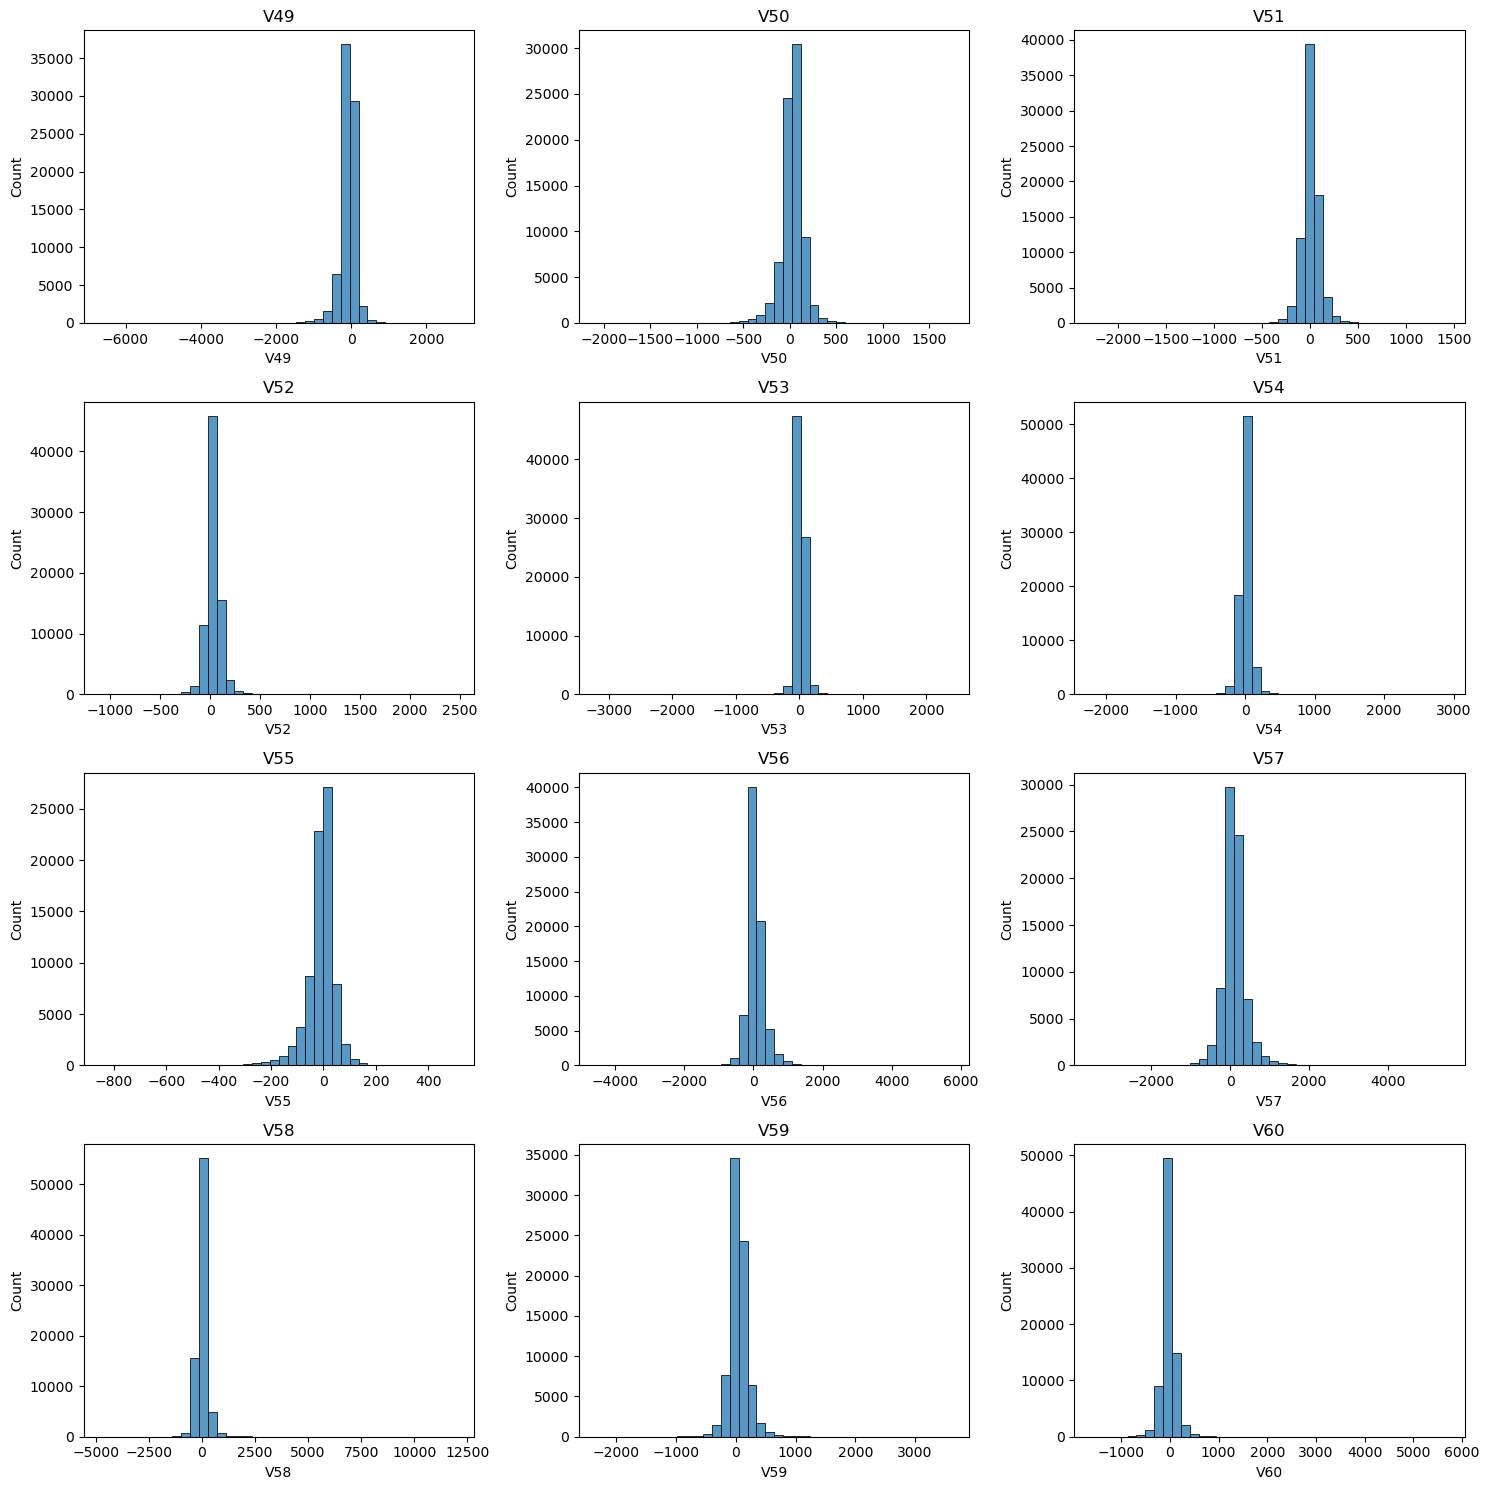

In [48]:
# Creación de histogramas para las variables de covarianza
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Ajustar tamaño de la figura

for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        variable = var_covarianza.iloc[:, i*3+j+36]
        sns.histplot(variable, bins=40, ax=ax)  # Ajustar número de bins
        ax.set_title(f"V{i*3+j+13+36}")

plt.tight_layout()
plt.show()

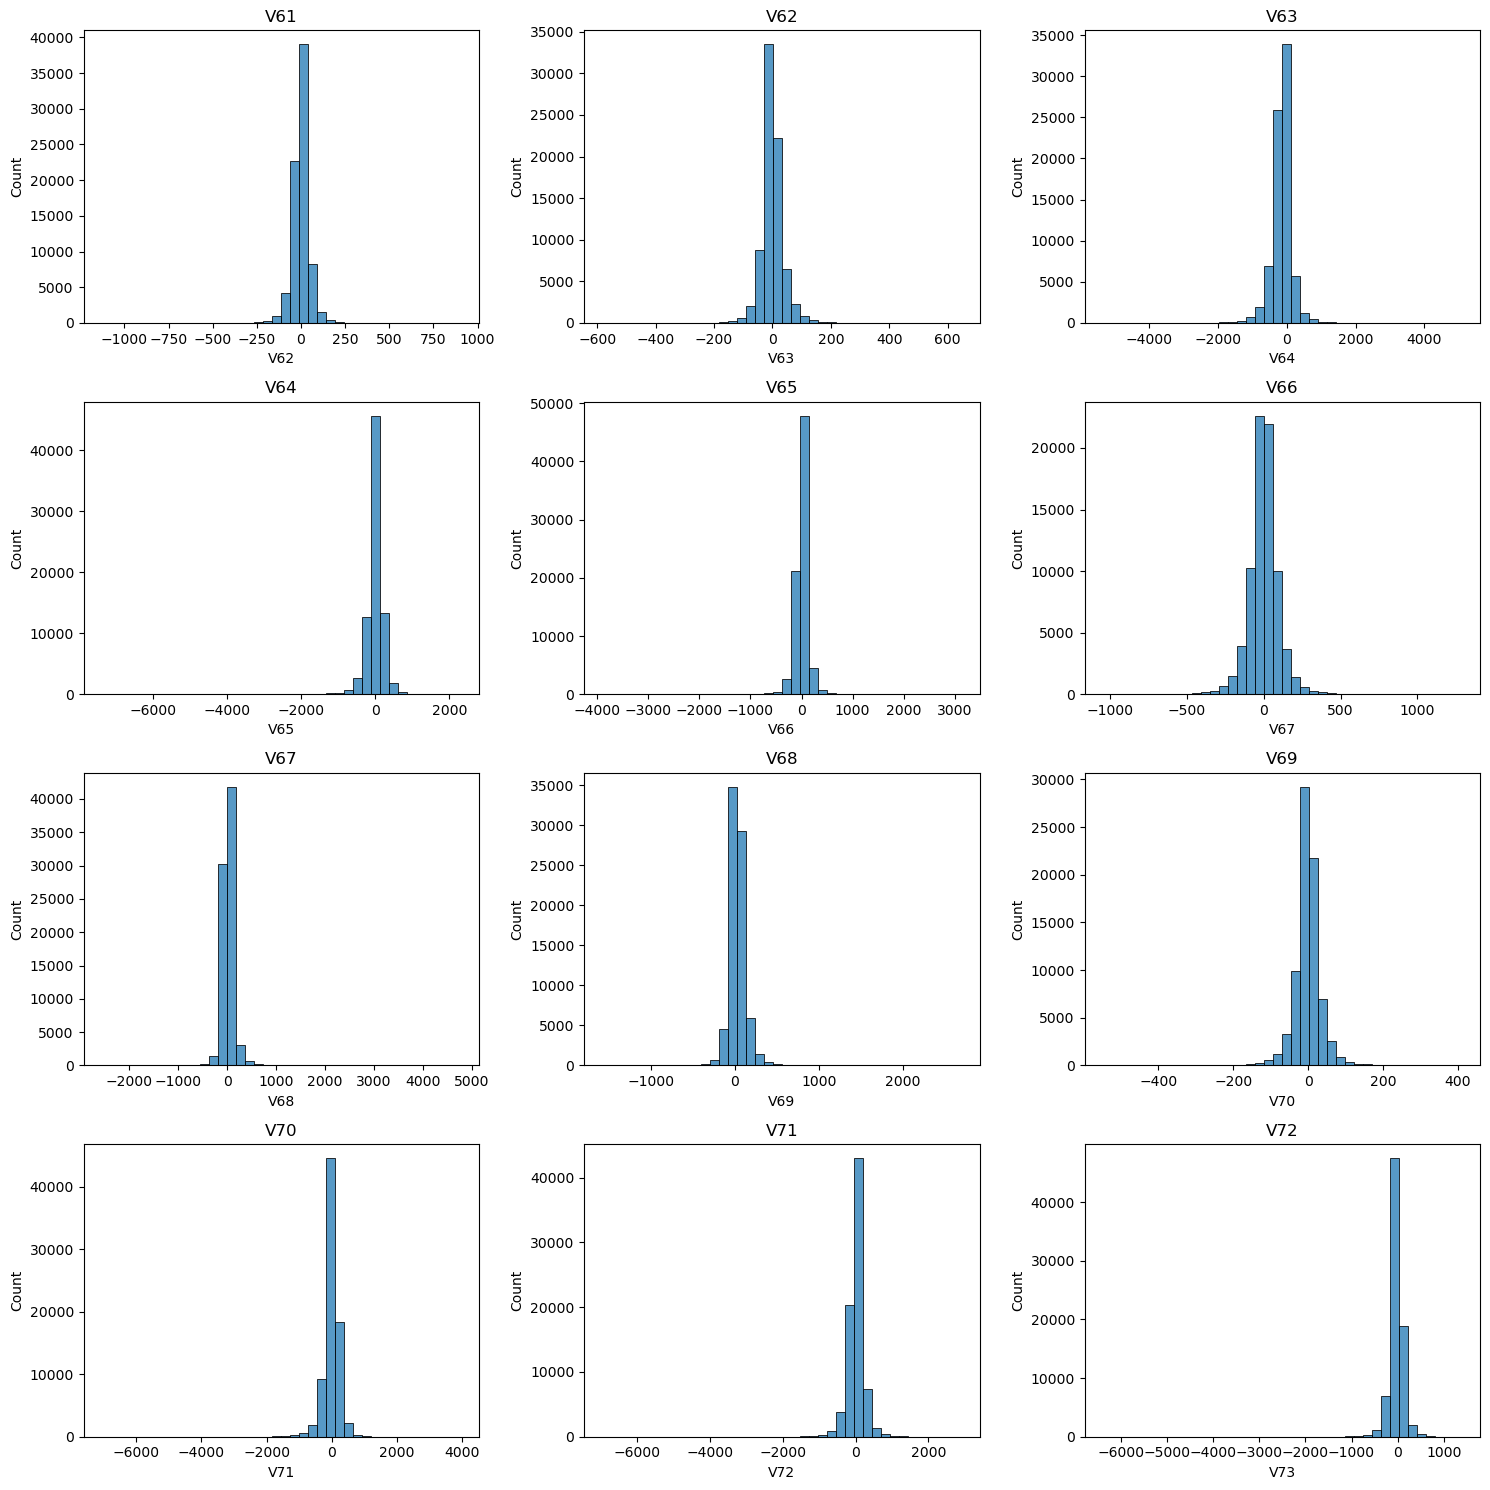

In [37]:
# Creación de histogramas para las variables de covarianza
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Ajustar tamaño de la figura

for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        variable = var_covarianza.iloc[:, i*3+j+48]
        sns.histplot(variable, bins=40, ax=ax)  # Ajustar número de bins
        ax.set_title(f"V{i*3+j+13+48}")

plt.tight_layout()
plt.show()

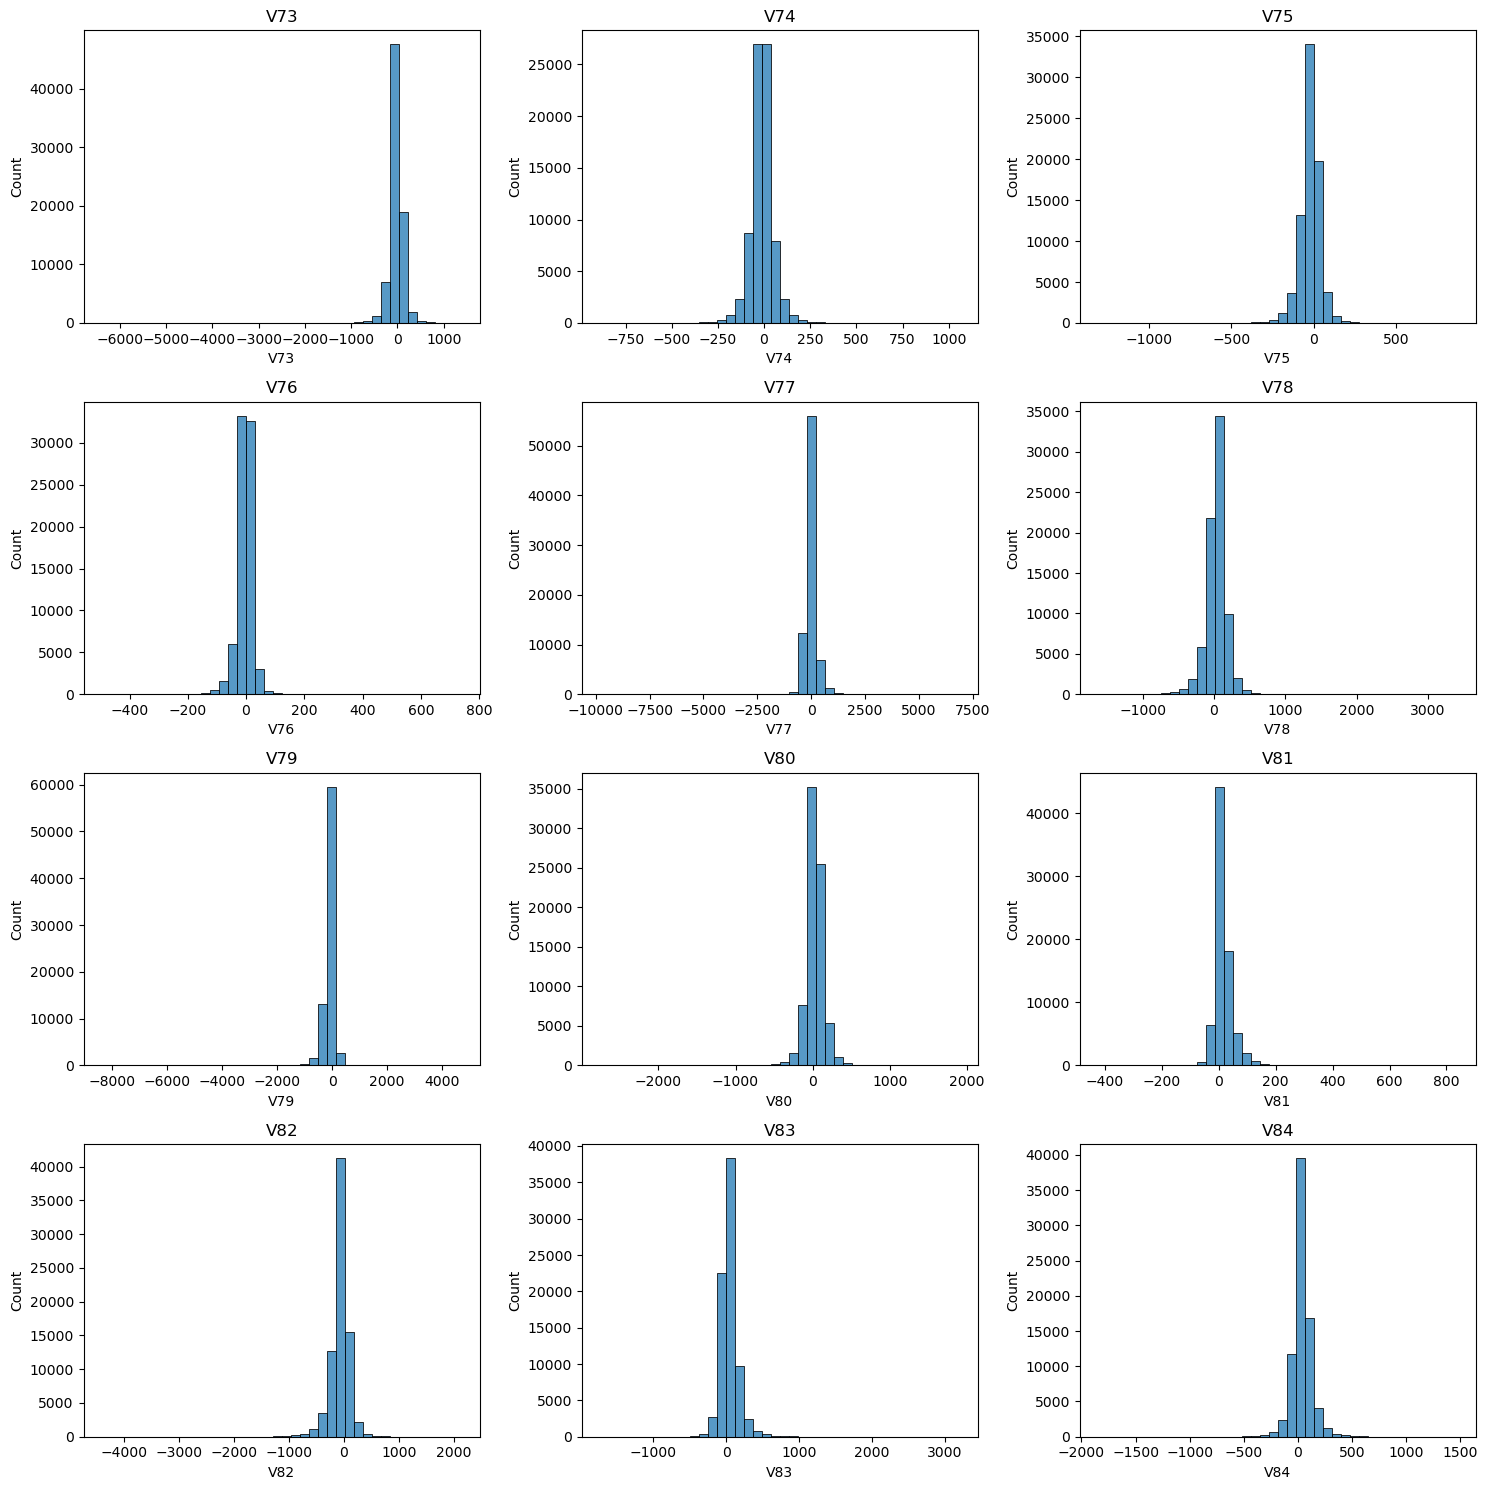

In [49]:
# Creación de histogramas para las variables de covarianza
fig, axes = plt.subplots(4, 3, figsize=(15, 15))  # Ajustar tamaño de la figura

for i in range(4):
    for j in range(3):
        ax = axes[i, j]
        variable = var_covarianza.iloc[:, i*3+j+60]
        sns.histplot(variable, bins=40, ax=ax)  # Ajustar número de bins
        ax.set_title(f"V{i*3+j+13+60}")

plt.tight_layout()
plt.show()

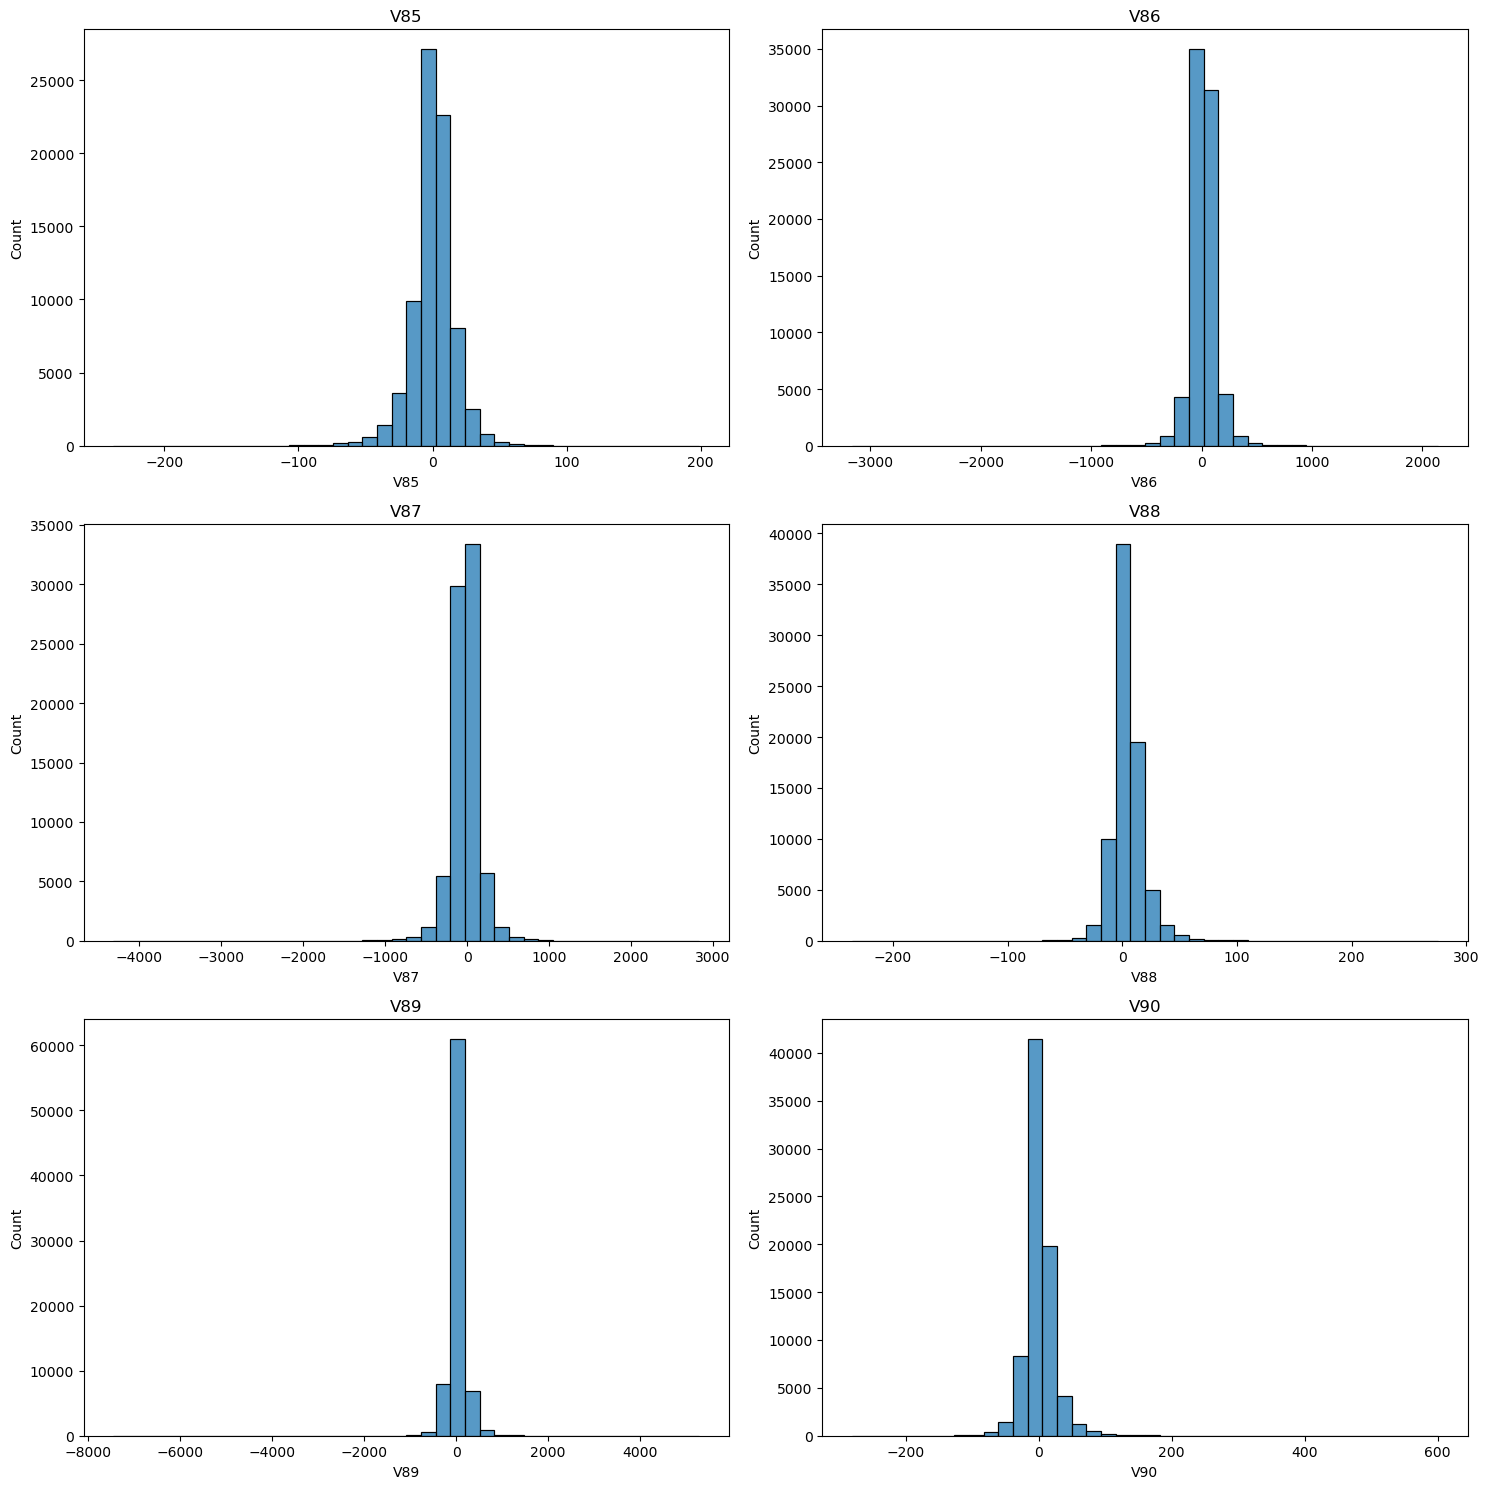

In [52]:
# Creación de histogramas para las variables de covarianza
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Ajustar tamaño de la figura

for i in range(3):
    for j in range(2):
        ax = axes[i, j]
        variable = var_covarianza.iloc[:, i*2+j+72]
        sns.histplot(variable, bins=40, ax=ax)  # Ajustar número de bins
        ax.set_title(f"V{i*2+j+13+72}")

plt.tight_layout()
plt.show()

In [64]:
corr_timbre = {}

for var in var_timbre:
    
    # Cálculo de la correlación de Pearson
    correlacion_pearson = dataset[var].corr(dataset['Y'])
    corr_timbre[var] = round(correlacion_pearson, 2)

print(corr_timbre)

min(corr_timbre.values()), max(corr_timbre.values())

{'V1': 0.22, 'V2': 0.03, 'V3': nan, 'V4': -0.04, 'V5': 0.11, 'V6': -0.03, 'V7': 0.0, 'V8': -0.18, 'V9': -0.02, 'V10': 0.04, 'V11': -0.13, 'V12': 0.01}


(-0.18, 0.22)

In [63]:
corr_covarianza = {}

for var in var_covarianza:
    
    # Cálculo de la correlación de Pearson
    correlacion_pearson = dataset[var].corr(dataset['Y'])
    corr_covarianza[var] = round(correlacion_pearson, 2)

min(corr_covarianza.values()), max(corr_covarianza.values())

(-0.13, 0.1)